# sup1B

Statistics overview (NGS):
               Q10          Q20          Q30
count  5000.000000  5000.000000  5000.000000
mean      0.993692     0.976143     0.934309
std       0.012977     0.039691     0.086729
min       0.869231     0.738462     0.376923
25%       0.992308     0.976923     0.915385
50%       1.000000     0.992308     0.969231
75%       1.000000     1.000000     0.992308
max       1.000000     1.000000     1.000000

Data example (first 5 rows):
                                             quality       Q10       Q20  \
0  EHEDHFDFIDDDEFFFCIHDHIHHFDCGHEDBHFGIFGFCDHCIGG...  1.000000  0.984615   
1  ;DHCFCHGA=GDHDHDGECGD/G&C<=?D2FGDHDB+EE?GCG)09...  0.984615  0.953846   
2  GDDECDGGFAHEDHHCGEHGDGAGGBCHHHHHHDHDHFGCDHEFGD...  1.000000  1.000000   
3  FHCFCFEGDFFFEHCHHDDIHFCHEHDHBEHHDHFDEHHDECGHDI...  0.992308  0.992308   
4  HCICGDHFGDDFDDFCGHDCGDGDFDGFHAFFFEFDDHDGCHCGHC...  1.000000  1.000000   

        Q30  
0  0.976923  
1  0.869231  
2  0.961538  
3  0.976923  
4  1.000000

/tmp/ipykernel_3908719/2509417447.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_3908719/2509417447.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])
/tmp/ipykernel_3908719/2509417447.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_3908719/2509417447.py:126: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])
/tmp/ipykernel_3908719/2509417447.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

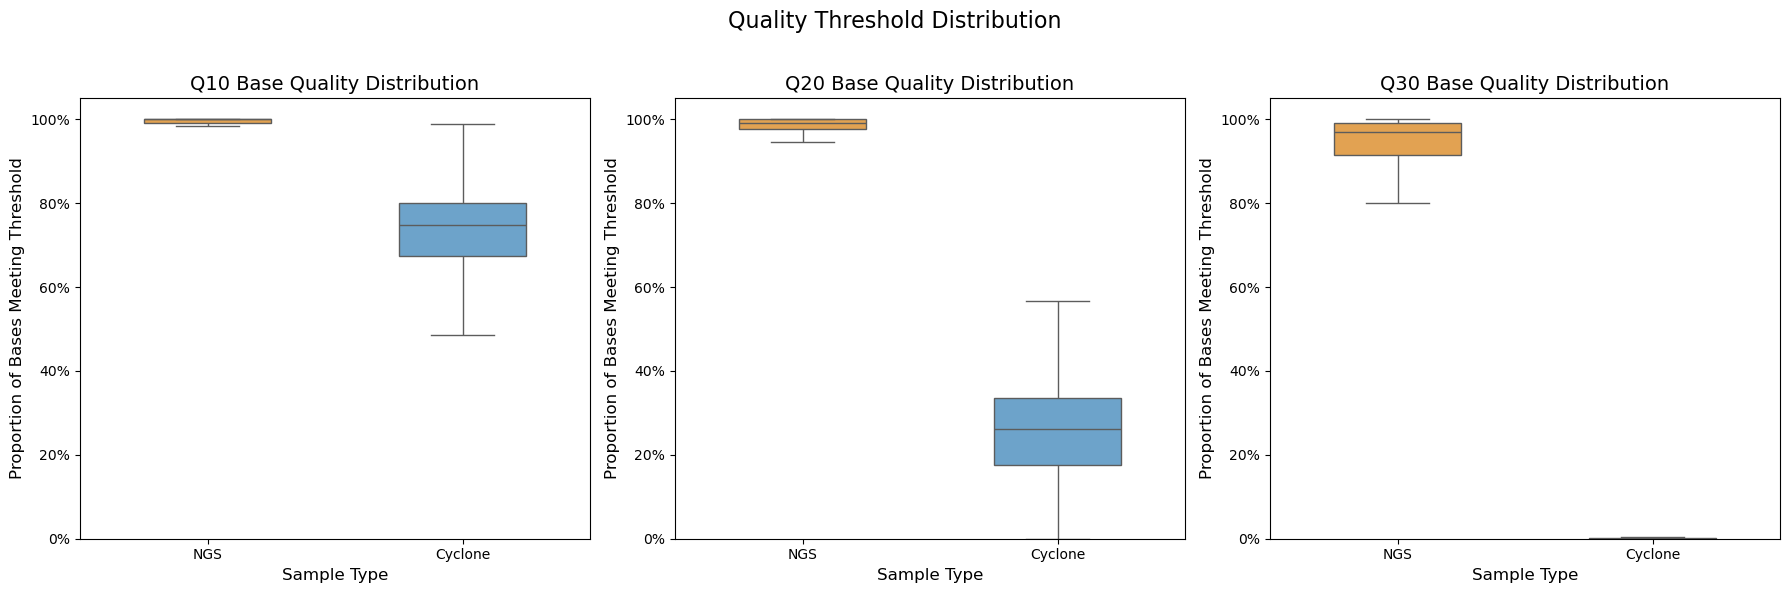

/tmp/ipykernel_3908719/2509417447.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3908719/2509417447.py:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])


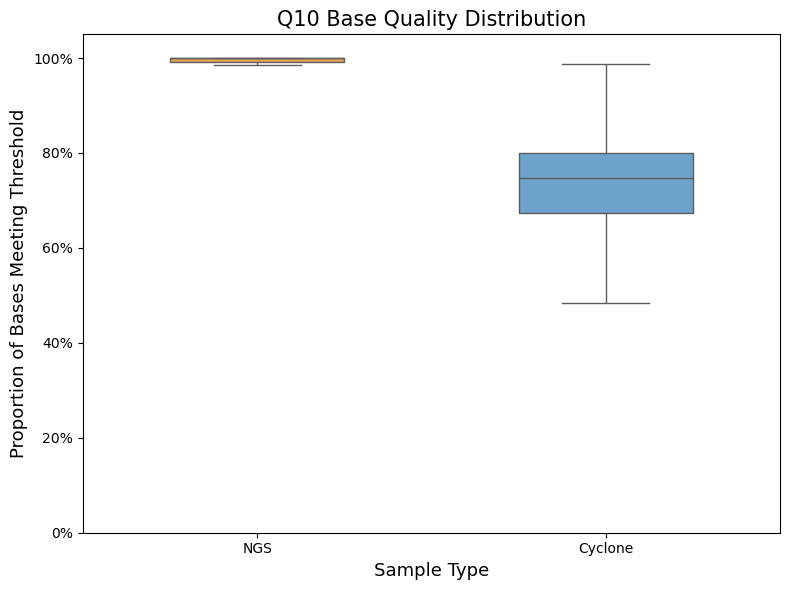

/tmp/ipykernel_3908719/2509417447.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3908719/2509417447.py:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])


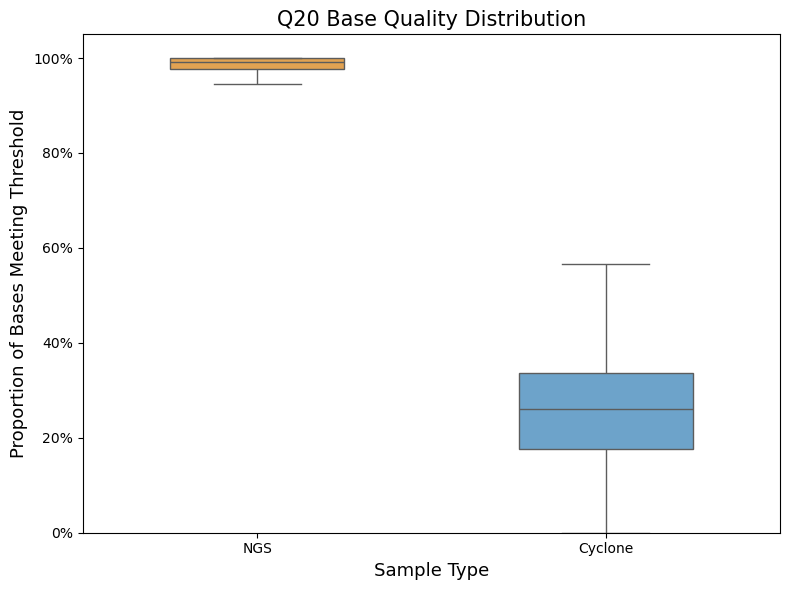

/tmp/ipykernel_3908719/2509417447.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/tmp/ipykernel_3908719/2509417447.py:154: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])


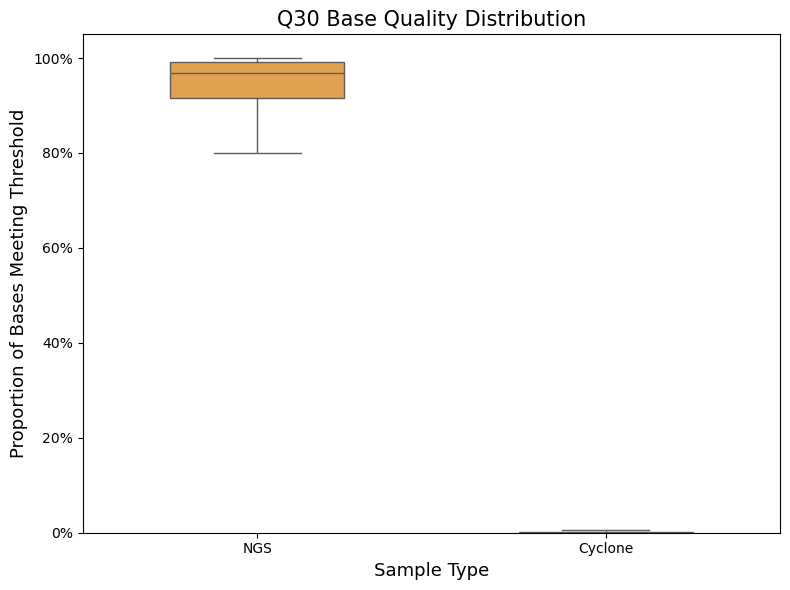

In [6]:
import pandas as pd
import numpy as np

# ---------------------------
# PART 1: NGS sample
# ---------------------------

# Read the quality lines file
quality_file = "/data1/zhanxiaojuan/PRCA033509/Q30/split_data/FF_NGS_random_5000_quality.txt"
df_FF_NGS = pd.DataFrame()

# Load every quality string line into DataFrame
with open(quality_file, 'r') as f:
    quality_lines = [line.strip() for line in f if line.strip()]
    df_FF_NGS['quality'] = quality_lines

# Define quality statistics calculation
def calculate_quality_stats(quality_string):
    # Convert ASCII to Phred+33 score
    quality_scores = [ord(char) - 33 for char in quality_string]
    total_bases = len(quality_scores)
    q10_count = sum(score >= 10 for score in quality_scores)
    q20_count = sum(score >= 20 for score in quality_scores)
    q30_count = sum(score >= 30 for score in quality_scores)
    return {
        'q10_ratio': q10_count / total_bases if total_bases > 0 else 0,
        'q20_ratio': q20_count / total_bases if total_bases > 0 else 0,
        'q30_ratio': q30_count / total_bases if total_bases > 0 else 0
    }

# Apply the calculation to every quality line
quality_stats = df_FF_NGS['quality'].apply(calculate_quality_stats)

# Expand the stats into columns
df_FF_NGS['Q10'] = quality_stats.apply(lambda x: x['q10_ratio'])
df_FF_NGS['Q20'] = quality_stats.apply(lambda x: x['q20_ratio'])
df_FF_NGS['Q30'] = quality_stats.apply(lambda x: x['q30_ratio'])

# Optionally save results
#output_file = "/home/zhanxiaojuan/data1/zhanxiaojuan/PRCA033509/Q30/split_data/FF_NGS_quality_stats.csv"
#df_FF_NGS.to_csv(output_file, index=False)

# Print stats overview and head
print("Statistics overview (NGS):")
print(df_FF_NGS[['Q10', 'Q20', 'Q30']].describe())
print("\nData example (first 5 rows):")
print(df_FF_NGS.head())

# ---------------------------
# PART 2: Cyclone sample
# ---------------------------

import pandas as pd
import numpy as np

# Read the quality lines file
quality_file = "/data1/zhanxiaojuan/PRCA033509/Q30/split_data/FF_Cyclone_random_5000_quality.txt"
df_FF_Cyclone = pd.DataFrame()

# Load lines into DataFrame
with open(quality_file, 'r') as f:
    quality_lines = [line.strip() for line in f if line.strip()]
    df_FF_Cyclone['quality'] = quality_lines

# Use same calculate_quality_stats function as before

# Apply the calculation to every Cyclone line
quality_stats = df_FF_Cyclone['quality'].apply(calculate_quality_stats)

# Expand the stats into columns
df_FF_Cyclone['Q10'] = quality_stats.apply(lambda x: x['q10_ratio'])
df_FF_Cyclone['Q20'] = quality_stats.apply(lambda x: x['q20_ratio'])
df_FF_Cyclone['Q30'] = quality_stats.apply(lambda x: x['q30_ratio'])

# Optionally save results
#output_file = "/home/zhanxiaojuan/data1/zhanxiaojuan/PRCA033509/Q30/split_data/FF_Cyclone_quality_stats.csv"
#df_FF_Cyclone.to_csv(output_file, index=False)

# Print stats overview and head for Cyclone
print("Statistics overview (Cyclone):")
print(df_FF_Cyclone[['Q10', 'Q20', 'Q30']].describe())
print("\nData example (first 5 rows):")
print(df_FF_Cyclone.head())

# ---------------------------
# PART 3: Plotting boxplots
# ---------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare for three thresholds
thresholds = ['Q10', 'Q20', 'Q30']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Set main title
fig.suptitle('Quality Threshold Distribution', fontsize=16)

# Boxplot for each threshold side by side
for i, threshold in enumerate(thresholds):
    # Prepare dataframes for current threshold
    df_NGS_current = df_FF_NGS[threshold].copy()
    df_NGS_current = pd.DataFrame({
        'Proportion': df_NGS_current,
        'Sample': 'NGS'
    })
    df_Cyclone_current = df_FF_Cyclone[threshold].copy()
    df_Cyclone_current = pd.DataFrame({
        'Proportion': df_Cyclone_current,
        'Sample': 'Cyclone'
    })
    # Combine data
    combined_df = pd.concat([df_NGS_current, df_Cyclone_current])
    # Plot boxplot
    ax = axes[i]
    sns.boxplot(
        x='Sample', y='Proportion', data=combined_df,
        palette=['#FAA43A', '#5DA5DA'], width=0.5,
        ax=ax, showfliers=False
    )
    ax.set_title(f'{threshold} Base Quality Distribution', fontsize=14)
    ax.set_ylabel('Proportion of Bases Meeting Threshold', fontsize=12)
    ax.set_xlabel('Sample Type', fontsize=12)
    ax.set_ylim(0, 1.05)
    ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])

#plt.savefig('/home/zhanxiaojuan/data1/zhanxiaojuan/PRCA033509/Q30/figure/quality_distribution.pdf', dpi=600)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Optionally, plot each boxplot separately
for threshold in thresholds:
    plt.figure(figsize=(8, 6))
    df_NGS_current = df_FF_NGS[threshold].copy()
    df_NGS_current = pd.DataFrame({
        'Proportion': df_NGS_current,
        'Sample': 'NGS'
    })
    df_Cyclone_current = df_FF_Cyclone[threshold].copy()
    df_Cyclone_current = pd.DataFrame({
        'Proportion': df_Cyclone_current,
        'Sample': 'Cyclone'
    })
    combined_df = pd.concat([df_NGS_current, df_Cyclone_current])
    ax = sns.boxplot(
        x='Sample', y='Proportion', data=combined_df,
        palette=['#FAA43A', '#5DA5DA'], width=0.5, showfliers=False
    )
    plt.title(f'{threshold} Base Quality Distribution', fontsize=15)
    plt.ylabel('Proportion of Bases Meeting Threshold', fontsize=13)
    plt.xlabel('Sample Type', fontsize=13)
    plt.ylim(0, 1.05)
    ax.set_yticklabels([f'{x:.0%}' for x in ax.get_yticks()])
    #plt.savefig(f'/home/zhanxiaojuan/data1/zhanxiaojuan/PRCA033509/Q30/figure/{threshold}_quality_distribution.pdf', dpi=600)
    plt.tight_layout()
    plt.show()

# sup1C

Calculating overall Non-functional ratio for each file...

Processing part 1 (part_000)...
Cyclone Non-functional Ratio: 0.4054
NGS Non-functional Ratio: 0.0683
------
Processing part 2 (part_001)...
Cyclone Non-functional Ratio: 0.3955
NGS Non-functional Ratio: 0.0675
------
Processing part 3 (part_002)...
Cyclone Non-functional Ratio: 0.3949
NGS Non-functional Ratio: 0.0694
------
Processing part 4 (part_003)...
Cyclone Non-functional Ratio: 0.4021
NGS Non-functional Ratio: 0.0703
------
Processing part 5 (part_004)...
Cyclone Non-functional Ratio: 0.3994
NGS Non-functional Ratio: 0.0712
------
Processing part 6 (part_005)...
Cyclone Non-functional Ratio: 0.4010
NGS Non-functional Ratio: 0.0691
------
Processing part 7 (part_006)...
Cyclone Non-functional Ratio: 0.3980
NGS Non-functional Ratio: 0.0687
------
Processing part 8 (part_007)...
Cyclone Non-functional Ratio: 0.3952
NGS Non-functional Ratio: 0.0674
------
Processing part 9 (part_008)...
Cyclone Non-functional Ratio: 0.3974


/tmp/ipykernel_3908719/89142776.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


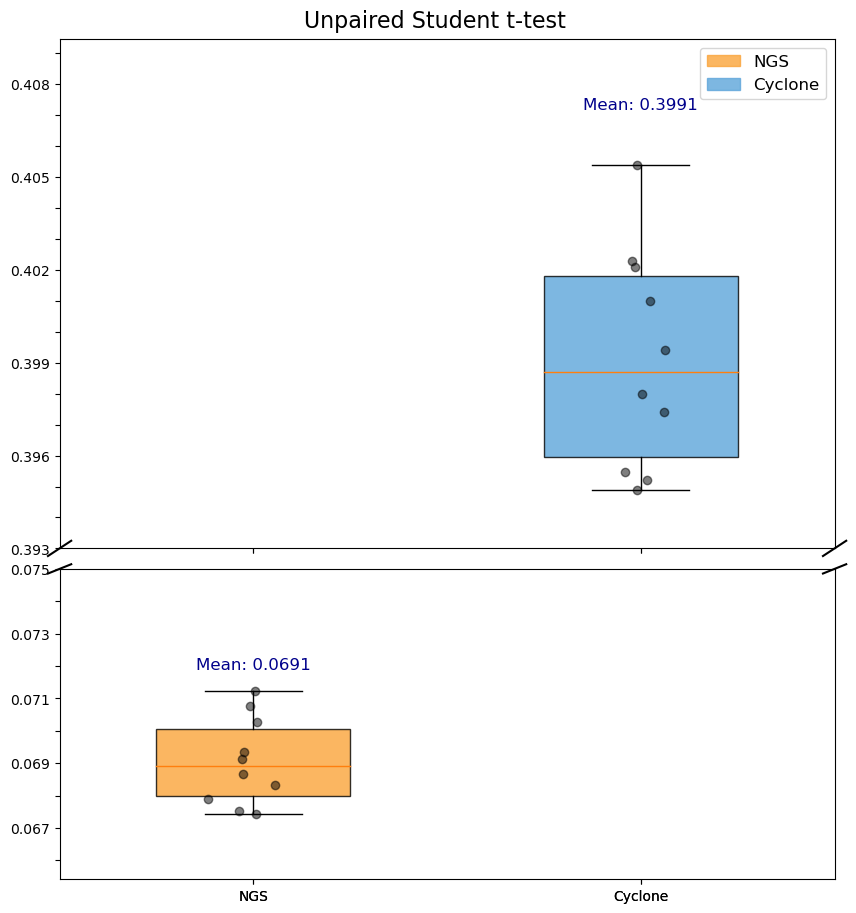

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import itertools
import seaborn as sns
from scipy.optimize import curve_fit
from collections import defaultdict

# Font configuration for minus symbol
mpl.rcParams['axes.unicode_minus'] = False

def calculate_overall_non_functional_ratio(cyclone_dir=None, ngs_dir=None, sample_name=None, num_files=10):
    """
    Calculate overall Non-functional ratio for each file
    
    Args:
        cyclone_dir: Path to Cyclone data directory
        ngs_dir: Path to NGS data directory
        sample_name: Sample name
        num_files: Number of files to process

    Returns:
        cyclone_overall_ratios: List of Non-functional ratio for each Cyclone file
        ngs_overall_ratios: List of Non-functional ratio for each NGS file
    """
    print("Calculating overall Non-functional ratio for each file...\n")
    
    # Store overall ratio for each file
    cyclone_overall_ratios = []
    ngs_overall_ratios = []
    
    for part_num in range(num_files):
        print(f"Processing part {part_num+1} (part_{part_num:03d})...")
        
        # File paths for Cyclone and NGS
        cyclone_file = os.path.join(cyclone_dir, f"{sample_name}.part_{part_num:03d}.meta.gz")
        ngs_file = os.path.join(ngs_dir, f"{sample_name}.part_{part_num:03d}.meta.gz")
        
        try:
            cyclone_df = pd.read_csv(cyclone_file, compression='gzip')
            ngs_df = pd.read_csv(ngs_file, compression='gzip')
            
            # Filter valid data
            cyclone_valid = cyclone_df[(cyclone_df['loc'].notna()) & 
                                     (cyclone_df['loc'] != 'region_not_covered')]
            ngs_valid = ngs_df[(ngs_df['loc'].notna()) & 
                              (ngs_df['loc'] != 'region_not_covered')]
            
            # Calculate Non-functional ratio for Cyclone
            cyclone_non_func_count = sum(cyclone_valid['func'] == 'Non-functional')
            cyclone_total_count = len(cyclone_valid)
            cyclone_ratio = cyclone_non_func_count / cyclone_total_count if cyclone_total_count > 0 else 0
            cyclone_overall_ratios.append(cyclone_ratio)
            
            # Calculate Non-functional ratio for NGS
            ngs_non_func_count = sum(ngs_valid['func'] == 'Non-functional')
            ngs_total_count = len(ngs_valid)
            ngs_ratio = ngs_non_func_count / ngs_total_count if ngs_total_count > 0 else 0
            ngs_overall_ratios.append(ngs_ratio)
            
            print(f"Cyclone Non-functional Ratio: {cyclone_ratio:.4f}")
            print(f"NGS Non-functional Ratio: {ngs_ratio:.4f}")
            print("------")
            
        except Exception as e:
            print(f"Error in part {part_num+1}: {e}")
            # On error, use previous value or 0
            cyclone_overall_ratios.append(cyclone_overall_ratios[-1] if cyclone_overall_ratios else 0)
            ngs_overall_ratios.append(ngs_overall_ratios[-1] if ngs_overall_ratios else 0)
    
    return cyclone_overall_ratios, ngs_overall_ratios

# -----------------------
# DATA PARAMETERS
# -----------------------
cyclone_dir = "/data1/zhanxiaojuan/PRCA033509/saturation_curve/7-ZXH_LC/cyclone/meta/random_split"
ngs_dir = "/data1/zhanxiaojuan/PRCA033509/saturation_curve/7-ZXH_LC/sge/meta/random_split"
sample_name = "7-ZXH_LC"
num_files = 10  # Total 10 files (part_000 to part_009)

# Run calculation
cyclone_overall_ratios, ngs_overall_ratios = calculate_overall_non_functional_ratio(
    cyclone_dir=cyclone_dir, 
    ngs_dir=ngs_dir, 
    sample_name=sample_name, 
    num_files=10
)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

# Reverse order: NGS on left, Cyclone on right
boxplot_data = [ngs_overall_ratios, cyclone_overall_ratios]  # Swap order
labels = ['NGS', 'Cyclone']  # Swap order

# Specify colors
colors = ['#FAA43A', '#5DA5DA']  # NGS:'#FAA43A', Cyclone:'#5DA5DA'

# Axis range parameters for split y-axis
top_min = 0.393    # Min for upper part
bottom_max = 0.075  # Max for lower part

# Calculate data range
max_val = max([max(data) for data in boxplot_data])
min_val = min([min(data) for data in boxplot_data])

# Number of data units per section
top_units = (max_val - top_min) / 0.001  # Each 0.001 is one "unit"
bottom_units = (bottom_max - min_val) / 0.001

# Set subplot height ratios so that each 0.001 appears with the same vertical height
height_ratios = [top_units, bottom_units]

# Create split y-axis subplots with proper height
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True, 
                               gridspec_kw={'height_ratios': height_ratios, 'hspace': 0.05})

# Draw boxplots on both subplots
box1 = ax1.boxplot(boxplot_data, patch_artist=True, labels=labels, widths=0.5)
box2 = ax2.boxplot(boxplot_data, patch_artist=True, labels=labels, widths=0.5)

# Color setting
for i, patch in enumerate(box1['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_alpha(0.8)
    
for i, patch in enumerate(box2['boxes']):
    patch.set_facecolor(colors[i])
    patch.set_alpha(0.8)

# Scatter the data points on both axes
for i, data in enumerate(boxplot_data):
    # Upper axis
    top_data = [d for d in data if d >= top_min]
    if top_data:
        x = np.random.normal(i+1, 0.04, size=len(top_data))
        ax1.plot(x, top_data, 'o', color='black', alpha=0.5)
    # Lower axis
    bottom_data = [d for d in data if d <= bottom_max]
    if bottom_data:
        x = np.random.normal(i+1, 0.04, size=len(bottom_data))
        ax2.plot(x, bottom_data, 'o', color='black', alpha=0.5)

# Set exact y-limits
ax1.set_ylim(top_min, max_val * 1.01)
ax2.set_ylim(min_val * 0.97, bottom_max)

def set_ticks_by_unit(ax, min_val, max_val, unit=0.001):
    """Set tick marks at given unit intervals on an axis."""
    start = np.floor(min_val / unit) * unit
    end = np.ceil(max_val / unit) * unit
    ticks = np.arange(start, end + unit/2, unit)
    ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))
    # Show fewer tick labels if label count is large
    if len(ticks) > 10:
        step = len(ticks) // 10 + 1
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(
            lambda x, pos: f'{x:.3f}' if pos % step == 0 else ''))
    else:
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

# Apply tick formatting
set_ticks_by_unit(ax1, top_min, max_val * 1.03)
set_ticks_by_unit(ax2, min_val * 0.97, bottom_max)

ax1.grid(False)
ax2.grid(False)

# Title and labels
fig.suptitle('Unpaired Student t-test', fontsize=16)
ax2.set_xlabel('')

# Add mean text annotation for each group
for i, data in enumerate(boxplot_data):
    avg = np.mean(data)
    if avg >= top_min:
        ax1.text(i+1, avg * 1.02, f'Mean: {avg:.4f}', 
                ha='center', va='bottom', fontsize=12, color='darkblue')
    else:
        ax2.text(i+1, avg * 1.04, f'Mean: {avg:.4f}', 
                ha='center', va='bottom', fontsize=12, color='darkblue')

# Add break marks to imply axis break
d = .015  # Size of break mark
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # lower left
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # lower right

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # upper left
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # upper right

# Add legend matching data order
ngs_patch = mpatches.Patch(color=colors[0], alpha=0.8, label='NGS')
cyclone_patch = mpatches.Patch(color=colors[1], alpha=0.8, label='Cyclone')
ax1.legend(handles=[ngs_patch, cyclone_patch], fontsize=12)

#plt.savefig('unpaired_student_t_test.pdf', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.subplots_adjust(top=0.95) # For title
plt.show()

# sup1D

Calculating diversity stepwise...

Adding file 1 (part_000)...
1-Cyclone: avg clone types per shared loc: 3.63
1-SGE: avg clone types per shared loc: 1.86
Shared loc count: 1080
------
Adding file 2 (part_001)...
2-Cyclone: avg clone types per shared loc: 4.40
2-SGE: avg clone types per shared loc: 2.05
Shared loc count: 2266
------
Adding file 3 (part_002)...
3-Cyclone: avg clone types per shared loc: 4.70
3-SGE: avg clone types per shared loc: 2.20
Shared loc count: 3519
------
Adding file 4 (part_003)...
4-Cyclone: avg clone types per shared loc: 5.02
4-SGE: avg clone types per shared loc: 2.26
Shared loc count: 4720
------
Adding file 5 (part_004)...
5-Cyclone: avg clone types per shared loc: 5.18
5-SGE: avg clone types per shared loc: 2.27
Shared loc count: 6039
------
Adding file 6 (part_005)...
6-Cyclone: avg clone types per shared loc: 5.31
6-SGE: avg clone types per shared loc: 2.28
Shared loc count: 7373
------
Adding file 7 (part_006)...
7-Cyclone: avg clone types per shared

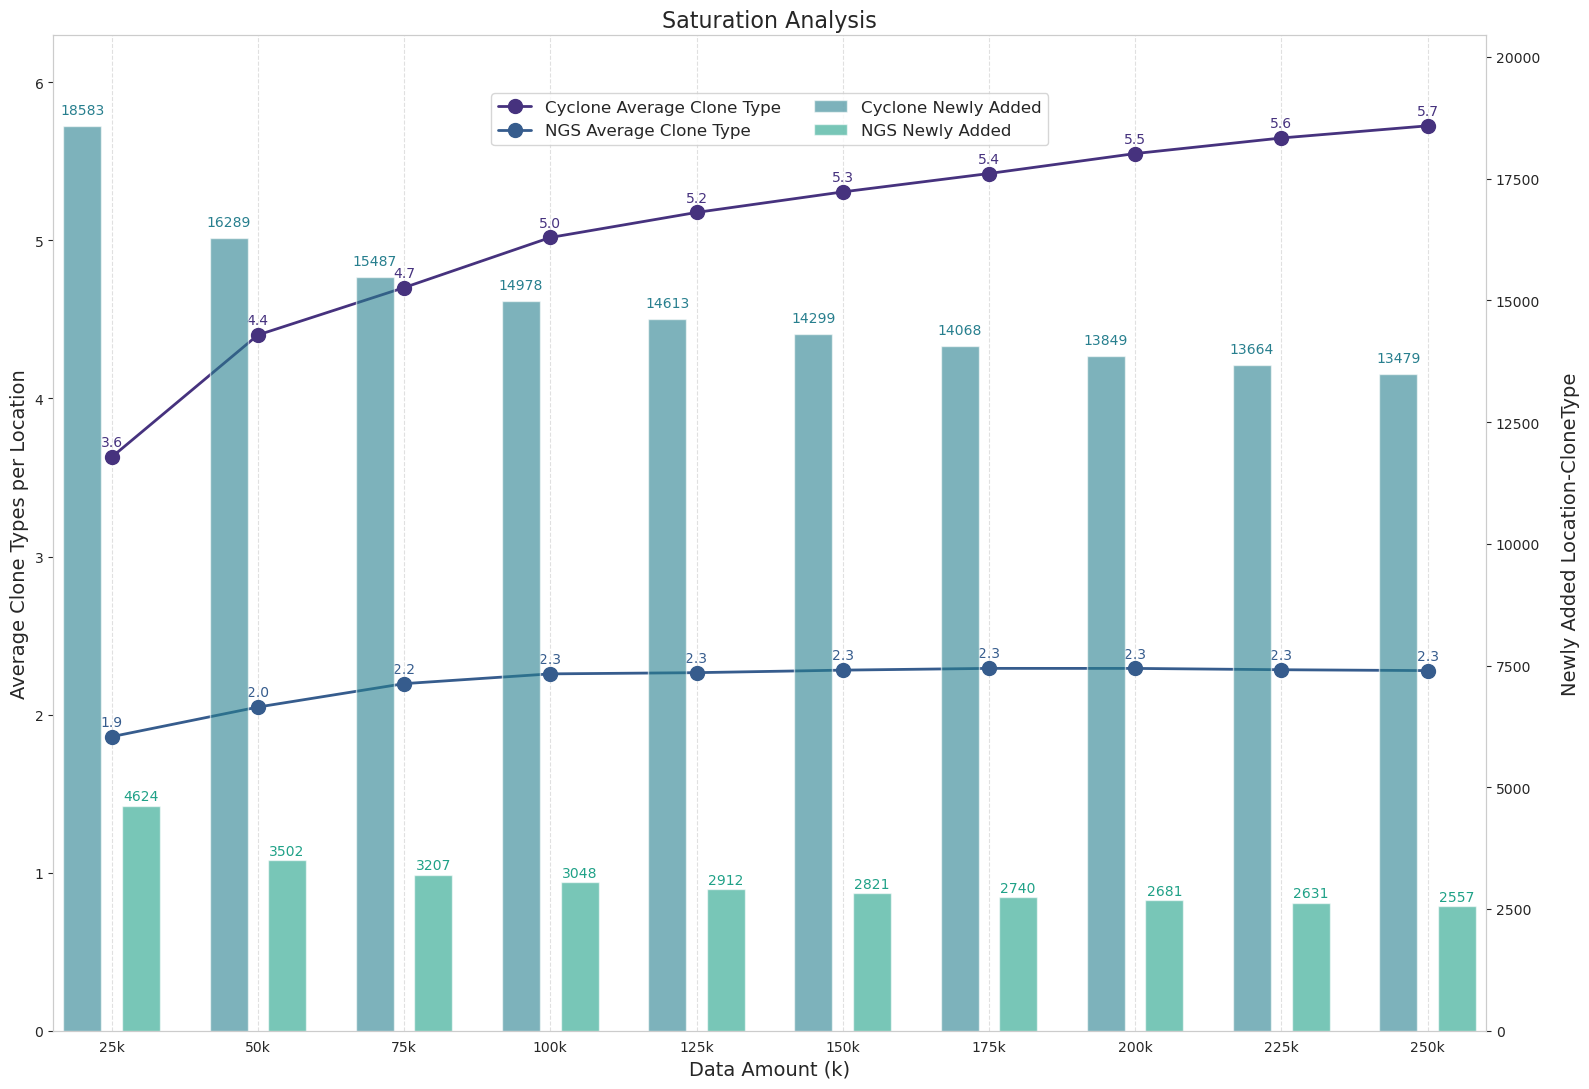

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import itertools
import seaborn as sns
from scipy.optimize import curve_fit
from collections import defaultdict

# Configure matplotlib to show minus sign properly
mpl.rcParams['axes.unicode_minus'] = False

def process_data(base_dir, sample_name, data_type, num_files=10):
    """
    Process one data type for saturation curve analysis.
    
    Args:
        base_dir: directory with files
        sample_name: sample name
        data_type: type string for print
        num_files: number of files
        
    Returns:
        mean_counts: mean cumulative counts at each data addition step
        mean_additions: mean number of new unique at each step
        lower_bound_counts: 95% CI lower
        upper_bound_counts: 95% CI upper
        total_unique_combinations: total number of unique loc_cdr3aa
    """
    file_sequences = {}
    
    print(f"Extracting loc_cdr3aa combinations for {data_type} data...")
    for part_num in range(num_files):
        contigs_file = os.path.join(base_dir, f"{sample_name}.part_{part_num:03d}.meta.gz")
        if not os.path.exists(contigs_file):
            print(f"Warning: missing file: {contigs_file}")
            continue
        try:
            contigs_df = pd.read_csv(contigs_file, compression='gzip')
            valid_df = contigs_df[(contigs_df['loc'].notna()) & (contigs_df['loc'] != 'region_not_covered') &
                                  (contigs_df['cdr3aa'].notna()) & (contigs_df['cdr3aa'] != 'region_not_covered')]
            valid_df['loc_cdr3aa'] = valid_df['loc'] + "_" + valid_df['cdr3aa']
            unique_loc_cdr3aa = set(valid_df['loc_cdr3aa'])
            file_sequences[part_num] = unique_loc_cdr3aa
            print(f"{contigs_file} contains {len(unique_loc_cdr3aa)} unique loc_cdr3aa combinations")
        except Exception as e:
            print(f"Error processing file {contigs_file}: {e}")
    
    # Unique combos over all files
    all_combinations = set()
    for combos in file_sequences.values():
        all_combinations.update(combos)
    total_unique_combinations = len(all_combinations)
    print(f"Total unique loc_cdr3aa combinations in all {data_type} files: {total_unique_combinations}")
    
    # Generate permutations for accumulation
    all_file_indices = list(file_sequences.keys())
    if len(all_file_indices) > 8:
        import random
        all_permutations = []
        for _ in range(100):
            all_permutations.append(random.sample(all_file_indices, len(all_file_indices)))
    else:
        all_permutations = list(itertools.permutations(all_file_indices))
    
    # Count cumulative and new additions for each permutation
    all_cumulative_counts = []
    all_new_additions = []
    for perm in all_permutations:
        perm_accumulation = [0]
        perm_additions = []
        current_sequences = set()
        for idx in perm:
            new_sequences = file_sequences[idx]
            new_additions = new_sequences - current_sequences
            perm_additions.append(len(new_additions))
            current_sequences.update(new_additions)
            current_count = len(current_sequences)
            perm_accumulation.append(current_count)
        all_cumulative_counts.append(perm_accumulation)
        all_new_additions.append(perm_additions)
        
    all_cumulative_counts = np.array(all_cumulative_counts)
    all_new_additions = np.array(all_new_additions)
    mean_counts = np.mean(all_cumulative_counts, axis=0)
    mean_additions = np.mean(all_new_additions, axis=0)
    lower_bound_counts = np.percentile(all_cumulative_counts, 2.5, axis=0)
    upper_bound_counts = np.percentile(all_cumulative_counts, 97.5, axis=0)
    
    return mean_counts, mean_additions, lower_bound_counts, upper_bound_counts, total_unique_combinations

def calculate_diversity(cyclone_dir=None, ngs_dir=None, sample_name=None, num_files=10):
    """
    Sequentially add files and compute average unique cdr3aa per loc
    
    Returns:
        cyclone_avgs: mean number at each step for Cyclone
        sge_avgs: mean number at each step for SGE
        common_locs_counts: number of shared loc at each step
    """
    print("Calculating diversity stepwise...\n")
    cyclone_all_data = defaultdict(set)
    sge_all_data = defaultdict(set)
    cyclone_avgs = []
    sge_avgs = []
    common_locs_counts = []
    
    for part_num in range(num_files):
        print(f"Adding file {part_num+1} (part_{part_num:03d})...")
        cyclone_file = os.path.join(cyclone_dir, f"{sample_name}.part_{part_num:03d}.meta.gz")
        sge_file = os.path.join(ngs_dir, f"{sample_name}.part_{part_num:03d}.meta.gz")
        try:
            cyclone_df = pd.read_csv(cyclone_file, compression='gzip')
            sge_df = pd.read_csv(sge_file, compression='gzip')
            
            cyclone_valid = cyclone_df[(cyclone_df['loc'].notna()) & 
                                       (cyclone_df['loc'] != 'region_not_covered') & 
                                       (cyclone_df['cdr3aa'].notna()) & 
                                       (cyclone_df['cdr3aa'] != 'region_not_covered')]
            sge_valid = sge_df[(sge_df['loc'].notna()) & 
                               (sge_df['loc'] != 'region_not_covered') & 
                               (sge_df['cdr3aa'].notna()) & 
                               (sge_df['cdr3aa'] != 'region_not_covered')]
            
            for _, row in cyclone_valid.iterrows():
                cyclone_all_data[row['loc']].add(row['cdr3aa'])
            for _, row in sge_valid.iterrows():
                sge_all_data[row['loc']].add(row['cdr3aa'])
                
            cyclone_locs = set(cyclone_all_data.keys())
            sge_locs = set(sge_all_data.keys())
            common_locs = cyclone_locs & sge_locs
            
            cyclone_avg = np.mean([len(cyclone_all_data[loc]) for loc in common_locs]) if common_locs else 0
            sge_avg = np.mean([len(sge_all_data[loc]) for loc in common_locs]) if common_locs else 0
            cyclone_avgs.append(cyclone_avg)
            sge_avgs.append(sge_avg)
            common_locs_counts.append(len(common_locs))
            print(f"{part_num+1}-Cyclone: avg clone types per shared loc: {cyclone_avg:.2f}")
            print(f"{part_num+1}-SGE: avg clone types per shared loc: {sge_avg:.2f}")
            print(f"Shared loc count: {len(common_locs)}")
            print("------")
        except Exception as e:
            print(f"Error in file {part_num+1}: {e}")
            cyclone_avgs.append(cyclone_avgs[-1] if cyclone_avgs else 0)
            sge_avgs.append(sge_avgs[-1] if sge_avgs else 0)
            common_locs_counts.append(common_locs_counts[-1] if common_locs_counts else 0)
    
    return cyclone_avgs, sge_avgs, common_locs_counts

# -------------------------------
# Define paths and run analysis
# -------------------------------
cyclone_dir = "/data1/zhanxiaojuan/PRCA033509/saturation_curve/7-ZXH_LC/cyclone/meta/random_split"
ngs_dir = "/data1/zhanxiaojuan/PRCA033509/saturation_curve/7-ZXH_LC/sge/meta/random_split"
sample_name = "7-ZXH_LC"
num_files = 10  # files part_000 to part_009

# Diversity curve stepwise
cyclone_avgs, sge_avgs, common_locs_counts = calculate_diversity(
    cyclone_dir=cyclone_dir, 
    ngs_dir=ngs_dir, 
    sample_name=sample_name, 
    num_files=num_files
)

# Cyclone: cumulative counts, additions, bounds
cyclone_mean, cyclone_additions, cyclone_lower, cyclone_upper, cyclone_total = process_data(
    cyclone_dir, sample_name, "Cyclone", num_files)

# NGS: cumulative counts, additions, bounds
ngs_mean, ngs_additions, ngs_lower, ngs_upper, ngs_total = process_data(
    ngs_dir, sample_name, "NGS", num_files)

# X-axis: amounts from 25k up to 250k
data_amounts = np.array([25, 50, 75, 100, 125, 150, 175, 200, 225, 250])  # in k units

# --------------- Plotting Section ---------------
plt.figure(figsize=(16, 11))  # large figure

# Style
sns.set_style("whitegrid")
colors = sns.color_palette("viridis", 6)

# Main y-axis: CDR3AA diversity
ax1 = plt.gca()
ax1.plot(data_amounts, cyclone_avgs, marker='o', markersize=10, linewidth=2, color=colors[0], 
         label='Cyclone Average Clone Type')
ax1.plot(data_amounts, sge_avgs, marker='o', markersize=10, linewidth=2, color=colors[1], 
         label='NGS Average Clone Type')

# Twin y-axis for bar new added combinations
bar_positions_cyclone = data_amounts - 5.0
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.0))
ax3.bar(bar_positions_cyclone, cyclone_additions, alpha=0.6, color=colors[2], width=6.5,
        label='Cyclone Newly Added')
bar_positions_ngs = data_amounts + 5.0
ax3.bar(bar_positions_ngs, ngs_additions, alpha=0.6, color=colors[3], width=6.5,
        label='NGS Newly Added')

ax1.set_xlabel('Data Amount (k)', fontsize=14)
ax1.set_ylabel('Average Clone Types per Location', fontsize=14)
ax3.set_ylabel('Newly Added Location-CloneType', fontsize=14, labelpad=15)
plt.title('Saturation Analysis', fontsize=16)
plt.xticks(data_amounts, [f'{int(x)}k' for x in data_amounts])

lines1, labels1 = ax1.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines3, labels1 + labels3, 
           loc='upper center', bbox_to_anchor=(0.5, 0.95), fontsize=12, ncol=2)

# Annotate average diversity lines
for i, amount in enumerate(data_amounts):
    ax1.text(amount, cyclone_avgs[i] + 0.05, f'{cyclone_avgs[i]:.1f}', 
             ha='center', va='bottom', fontsize=10, color=colors[0])
    ax1.text(amount, sge_avgs[i] + 0.05, f'{sge_avgs[i]:.1f}', 
             ha='center', va='bottom', fontsize=10, color=colors[1])

# Annotate bar heights for Cyclone and NGS
for i, amount in enumerate(data_amounts):
    ax3.text(bar_positions_cyclone[i], cyclone_additions[i] + max(cyclone_additions)*0.01, 
            f'{int(cyclone_additions[i])}', 
            ha='center', va='bottom', fontsize=10, color=colors[2])
    ax3.text(bar_positions_ngs[i], ngs_additions[i] + max(ngs_additions)*0.01, 
            f'{int(ngs_additions[i])}', 
            ha='center', va='bottom', fontsize=10, color=colors[3])

max_avg = max(max(cyclone_avgs), max(sge_avgs))
ax1.set_ylim(0, max_avg * 1.1)
max_additions = max(max(cyclone_additions), max(ngs_additions))
ax3.set_ylim(0, max_additions * 1.1)

plt.xlim(15, 260)
ax1.grid(False)
ax3.grid(False)
ax1.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
# plt.savefig('Saturation.pdf', dpi=600, bbox_inches='tight')  # Uncomment to save
plt.show()

# sup1G

/tmp/ipykernel_1586151/708217888.py:24: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  bulk = pd.read_csv(bulk_paths[iso], sep='\t')


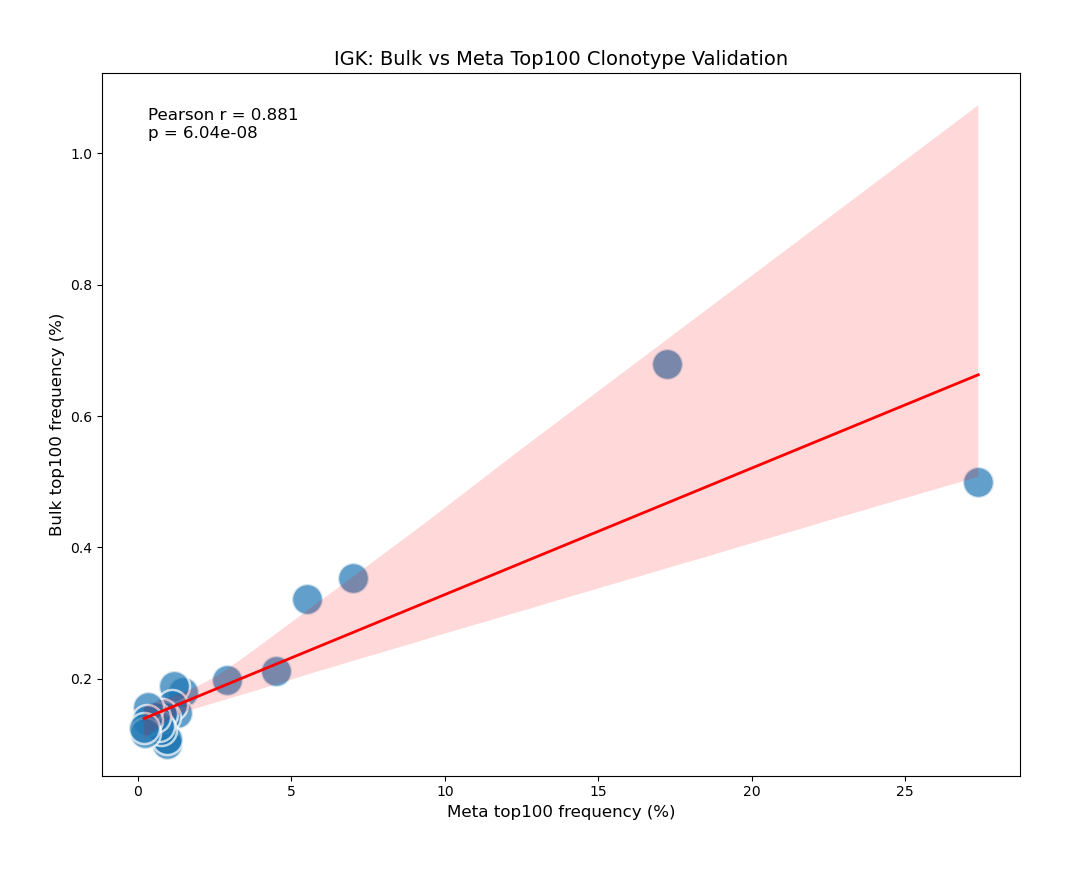

In [2]:
# 百分比
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 文件映射
bulk_paths = {
    'IGK': '/data3/zhangyang/G400/V350375874_IGK/L04/V350375874_L04_D06053D2/mixcr/IGK.clone.tsv'
}
meta_paths = {
    iso: f'/data1/zhangyang/Method/Review/Bulk-XCR/D06053D2_P1/percent/meta_with_cellid_top200_{iso}clone_valuecounts.csv'
    for iso in bulk_paths.keys()
}

# 只画IGK
iso_list = ['IGK']

# 创建单个子图（不是数组）
fig, ax = plt.subplots(figsize=(10, 8))

for iso in iso_list:
    # 读bulk表格并算top100及频率
    bulk = pd.read_csv(bulk_paths[iso], sep='\t')
    cdr3_counts = bulk['aaSeqCDR3'].value_counts().head(100)
    b = (
        cdr3_counts
        .reset_index()
        .rename(columns={'index': 'junction_aa', 'aaSeqCDR3': 'counts'})
    )
    total_bulk = bulk.shape[0]
    b['percent'] = b['counts'] / total_bulk * 100

    # 读meta表格，取前100行
    a = pd.read_csv(meta_paths[iso]).head(100)
    
    # fraction列转float
    if a['fraction'].dtype == object:
        a['fraction'] = a['fraction'].str.rstrip('%').astype(float)
    else:
        a['fraction'] = a['fraction'].astype(float)

    # 合并
    df = a.merge(b, on='junction_aa')
    
    # 作图
    sns.scatterplot(data=df, x='fraction', y='percent', ax=ax, s=500, alpha=0.7)
    sns.regplot(data=df, x='fraction', y='percent', scatter=False, 
                color='red', ax=ax, line_kws={'linewidth': 2})
    
    # 相关性
    corr, p_value = stats.pearsonr(df['fraction'], df['percent'])
    
    # 添加相关系数文本
    ax.text(0.05, 0.95, f'Pearson r = {corr:.3f}\np = {p_value:.2e}', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Meta top100 frequency (%)', fontsize=12)
    ax.set_ylabel('Bulk top100 frequency (%)', fontsize=12)
    ax.set_title(f'{iso}: Bulk vs Meta Top100 Clonotype Validation', fontsize=14)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.grid(False)
plt.savefig('sup1G.pdf')
plt.show()

# sup1H

sscir-vs-bulk (n=5000) | Pearson r=0.678 p=1.67e-07 | Spearman r=0.749 p=1.4e-09


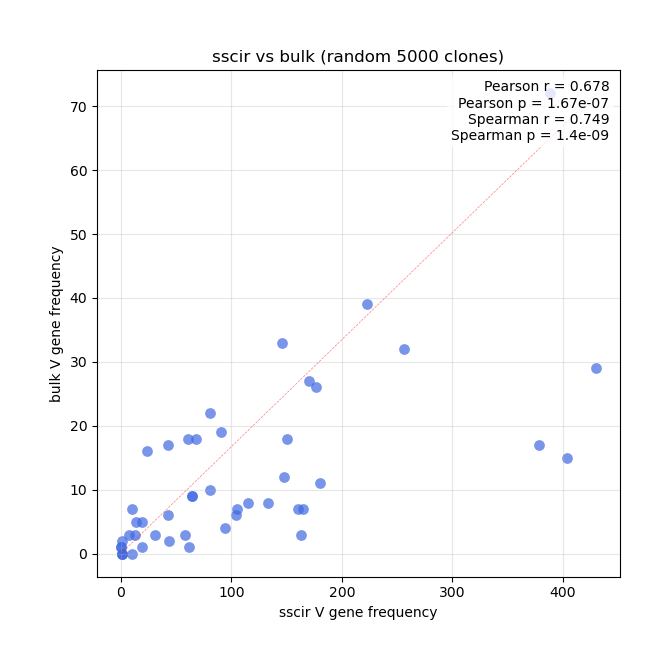

sscir-vs-rh (n=5000) | Pearson r=0.116 p=0.448 | Spearman r=0.226 p=0.135


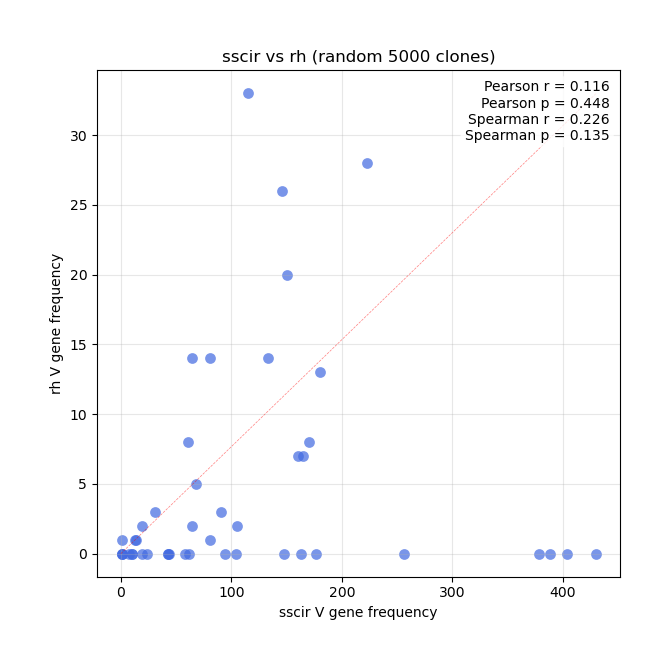

rh-vs-bulk (n=5000) | Pearson r=0.253 p=0.0975 | Spearman r=0.347 p=0.0212


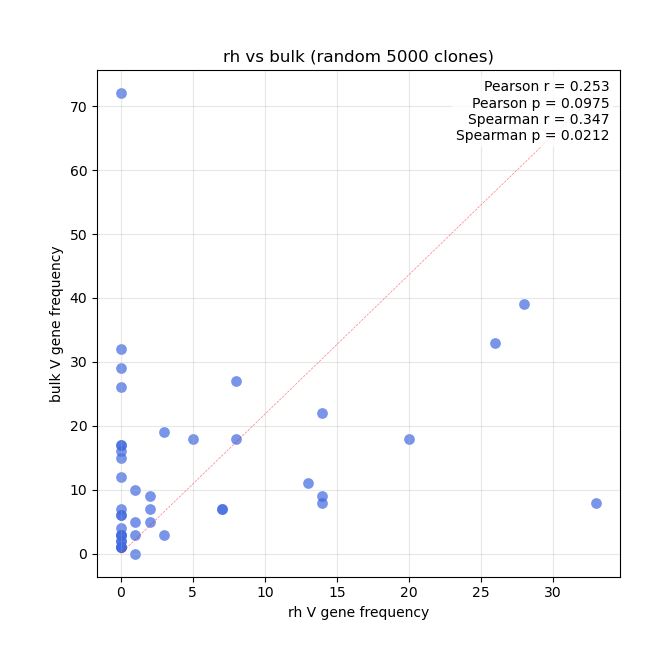

In [4]:
df_rh=pd.read_csv('/data1/fengyu/methods/zy/Review/for_github/Review/P1-rhPCR-TRB.clones_TRB.tsv',sep='\t')
df_rh['allVHitsWithScore'] = df_rh['allVHitsWithScore'].str.split('(', expand=True)[0]
df_sscir=pd.read_csv('/data1/fengyu/methods/zy/Review/for_github/Review/P1-sscir-TRB.clones_TRB.tsv',sep='\t')
df_sscir['allVHitsWithScore'] = df_sscir['allVHitsWithScore'].str.split('(', expand=True)[0]
df_bulk1=pd.read_csv('/data1/fengyu/methods/zy/Review/for_github/Review/250NC00786021_01.clones_TRB.tsv',sep='\t')
df_bulk2=pd.read_csv('/data1/fengyu/methods/zy/Review/for_github/Review/250NC01065021_01.clones_TRB.tsv',sep='\t')
df_bulk = pd.concat([df_bulk1,df_bulk2],ignore_index=True)
df_bulk['allVHitsWithScore'] = df_bulk['allVHitsWithScore'].str.split('(', expand=True)[0]
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# ---------- 参数 ----------
rng = np.random.RandomState(42)
n_sample = 5000

# ---------- 抽样 ----------
sscir_s = df_sscir.sample(n=n_sample, random_state=rng)
bulk_s  = df_bulk#.sample(n=n_sample, random_state=rng)
rh_s    = df_rh#.sample(n=n_sample, random_state=rng)

# ---------- 通用绘图函数 ----------
def plot_pair(df1, df2, name1, name2, fname):
    vc1 = df1['allVHitsWithScore'].value_counts()
    vc2 = df2['allVHitsWithScore'].value_counts()
    all_idx = vc1.index.union(vc2.index)
    v1 = vc1.reindex(all_idx, fill_value=0)
    v2 = vc2.reindex(all_idx, fill_value=0)

    pr, pp  = pearsonr(v1, v2)
    sr, sp  = spearmanr(v1, v2)

    print(f"{name1}-vs-{name2} (n={n_sample}) | "
          f"Pearson r={pr:.3f} p={pp:.3g} | Spearman r={sr:.3f} p={sp:.3g}")

    plt.figure(figsize=(6,6))
    plt.scatter(v1, v2, s=60, alpha=0.7, c='royalblue')
    plt.plot([0, v1.max()], [0, v2.max()], 'r--', alpha=0.5)
    plt.xlabel(f'{name1} V gene frequency')
    plt.ylabel(f'{name2} V gene frequency')
    plt.title(f'{name1} vs {name2} (random {n_sample} clones)')
    plt.grid(alpha=0.3)

    textstr = (f'Pearson r = {pr:.3f}\n'
               f'Pearson p = {pp:.3g}\n'
               f'Spearman r = {sr:.3f}\n'
               f'Spearman p = {sp:.3g}')
    plt.text(0.98, 0.98, textstr, transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    plt.tight_layout()
    plt.savefig(fname)
    plt.show()

# ---------- 三次对比 ----------
plot_pair(sscir_s, bulk_s, 'sscir', 'bulk', './sup1H_bulk_vs_sscir_213.pdf')
plot_pair(sscir_s, rh_s,   'sscir', 'rh',   './sup1H_rh_vs_sscir_213.pdf')
plot_pair(rh_s,    bulk_s, 'rh',    'bulk', './sup1H_rh_vs_bulk_213.pdf')

# sup1K

Processing FF sample file...
Reading file: /data1/zhanxiaojuan/PRCA033509/read_length_distribution/FF/mixcr/7-ZXH_LC.part_000.mixcr_align.4667.fastq
File 7-ZXH_LC.part_000.mixcr_align.4667.fastq total reads: 4667
Number of reads after outlier removal: 4667
Processing FFPE sample file...
Reading file: /data1/zhanxiaojuan/PRCA033509/read_length_distribution/FFPE/mixcr/FFPE.mixcr_align.fastq
File FFPE.mixcr_align.fastq total reads: 4667
Number of reads after outlier removal: 4667


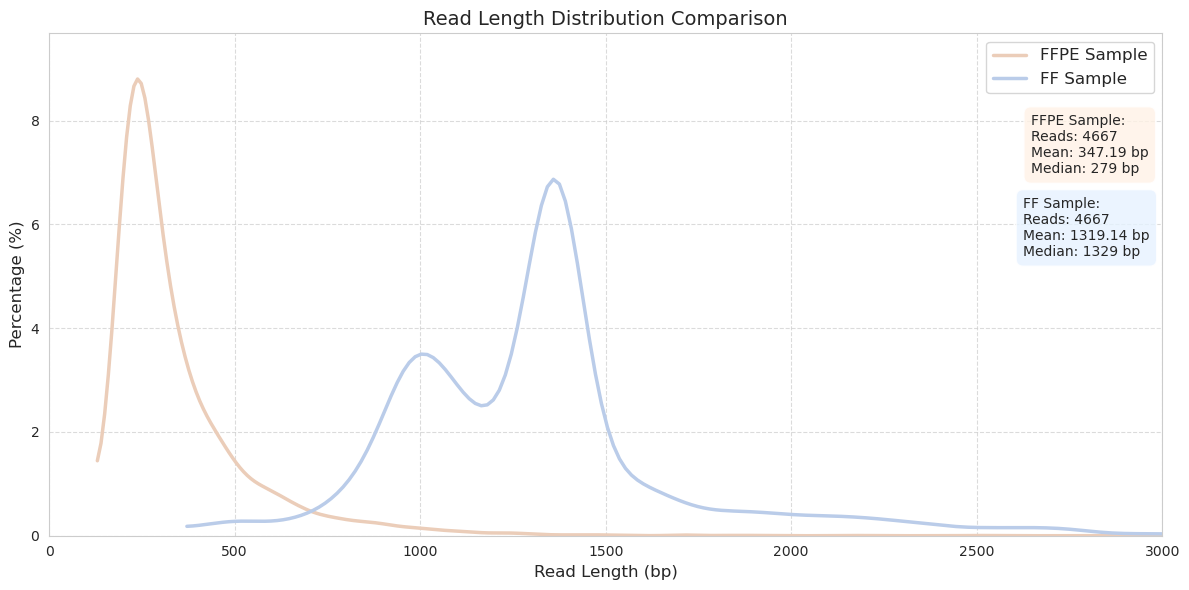

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Bio import SeqIO
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import make_interp_spline

# Set plot style and config
sns.set_style("whitegrid")
plt.rcParams['axes.unicode_minus'] = False    # Properly display minus sign

# File paths
ff_file = "/data1/zhanxiaojuan/PRCA033509/read_length_distribution/FF/mixcr/7-ZXH_LC.part_000.mixcr_align.4667.fastq"
ffpe_file = "/data1/zhanxiaojuan/PRCA033509/read_length_distribution/FFPE/mixcr/FFPE.mixcr_align.fastq"

def process_fastq_file(file_path, outlier_threshold=30000):
    """
    Process a FASTQ file and return smoothed read length distribution curve data
    """
    read_lengths = []
    print(f"Reading file: {file_path}")
    try:
        # Read all sequences and get their lengths
        with open(file_path, "rt") as handle:
            for record in SeqIO.parse(handle, "fastq"):
                read_lengths.append(len(record.seq))
        total_reads = len(read_lengths)
        print(f"File {file_path.split('/')[-1]} total reads: {total_reads}")

        mean_length = np.mean(read_lengths)
        median_length = np.median(read_lengths)
        std_dev = np.std(read_lengths)

        # Filter out outliers
        filtered_lengths = [length for length in read_lengths if length <= outlier_threshold]
        print(f"Number of reads after outlier removal: {len(filtered_lengths)}")

        # Histogram binning
        counts, bins = np.histogram(filtered_lengths, bins=150)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        percentages = counts / total_reads * 100

        # Gaussian smoothing
        smoothed_percentages = gaussian_filter1d(percentages, sigma=2)
        # Spline for curve
        x_smooth = np.linspace(min(bin_centers), max(bin_centers), 300)
        spl = make_interp_spline(bin_centers, smoothed_percentages, k=3)
        y_smooth = spl(x_smooth)
        y_smooth = np.maximum(y_smooth, 0)

        return {
            'x_smooth': x_smooth,
            'y_smooth': y_smooth,
            'stats': {
                'total_reads': total_reads,
                'mean_length': mean_length,
                'median_length': median_length,
                'std_dev': std_dev
            }
        }
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Process both files
print("Processing FF sample file...")
ff_data = process_fastq_file(ff_file)
print("Processing FFPE sample file...")
ffpe_data = process_fastq_file(ffpe_file)

# Create the plot
plt.figure(figsize=(12, 6))

# Draw curves
plt.plot(ffpe_data['x_smooth'], ffpe_data['y_smooth'], 
         linewidth=2.5, color='#ebcdb9', linestyle='-', label='FFPE Sample')
plt.plot(ff_data['x_smooth'], ff_data['y_smooth'], 
         linewidth=2.5, color='#bacce9', linestyle='-', label='FF Sample')

plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Read Length Distribution Comparison', fontsize=14)
plt.xlabel('Read Length (bp)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(fontsize=12, loc='upper right')

# Set axes limits
plt.xlim(0, 3000)
y_max = max(max(ff_data['y_smooth']), max(ffpe_data['y_smooth']))
plt.ylim(0, y_max * 1.1)  # Add margin on y axis

# Add statistics boxes on plot
ff_info = f"FF Sample:\n" \
           f"Reads: {ff_data['stats']['total_reads']}\n" \
           f"Mean: {ff_data['stats']['mean_length']:.2f} bp\n" \
           f"Median: {ff_data['stats']['median_length']:.0f} bp"

ffpe_info = f"FFPE Sample:\n" \
            f"Reads: {ffpe_data['stats']['total_reads']}\n" \
            f"Mean: {ffpe_data['stats']['mean_length']:.2f} bp\n" \
            f"Median: {ffpe_data['stats']['median_length']:.0f} bp"

plt.annotate(ff_info, xy=(0.875, 0.675), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#e6f2ff", alpha=0.8),
             verticalalignment='top')

plt.annotate(ffpe_info, xy=(0.882, 0.84), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", facecolor="#fff2e6", alpha=0.8),
             verticalalignment='top')

plt.tight_layout()
# Show the plot
plt.show()